In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp

In [2]:
r,theta,R,p,v,d,E,h,f,c1,c2,c3 =smp.symbols('r θ R p v d E h f c1 c2 c3')

In [34]:
E=25000000
R=10
v=0.2
h=0.3
d=E*h**3/(12*(1-v**2))
p=10
d

58593.74999999999

In [18]:
f=r/R*p
f

r

In [19]:
#volume papa goudin
P=(f*r/2)*2*smp.pi*2/3*r
P

2*pi*r**3/3

In [20]:
q=P/2/smp.pi
q

r**3/3

In [21]:
w= smp.symbols('w', cls=smp.Function)
w=w(r)
    

In [22]:
nabla2=smp.diff((smp.diff(w,r)),r)+1/r*(smp.diff(w,r))

In [23]:
qr=-d*smp.diff(nabla2,r)
qr

-58593.75*Derivative(w(r), (r, 3)) - 58593.75*Derivative(w(r), (r, 2))/r + 58593.75*Derivative(w(r), r)/r**2

In [24]:
int1=smp.integrate(q/d,r)
int2=smp.integrate(r*(int1),r)
int3=smp.integrate(1/r*(int2),r)
w=int3+1/4*c1*r**2+c3
w

0.25*c1*r**2 + c3 + 3.95061728395062e-8*r**6

In [25]:

wr=w.subs([(r,10)])
nabla2=smp.diff((smp.diff(w,r)),r)+1/r*(smp.diff(w,r))

m=-d*(smp.diff((smp.diff(w,r)),r)+1/r*v*(smp.diff(w,r)))
mr=m.subs([(r,10)])

g=smp.diff(w,r)
g0=g.subs([(r,0)])

mr

-35156.25*c1 - 722.222222222222

In [26]:
sols=smp.solve([wr,mr],[c1,c3])
sols

{c1: -0.0205432098765432, c3: 0.474074074074074}

In [36]:
C1= -120.37037037037*p/d
C3= 2777.77777777778*p/d
wf=w.subs([(c3,C3)])
W=wf.subs([(c1,C1)])
Mr=-d*(smp.diff((smp.diff(W,r)),r)+1/r*v*(smp.diff(W,r)))
W

3.95061728395062e-8*r**6 - 0.00513580246913579*r**2 + 0.474074074074075

In [71]:
d=E*h**3/(12*(1-v**2))
p=10
WW=smp.lambdify([r],W)
MR=smp.lambdify([r],Mr)

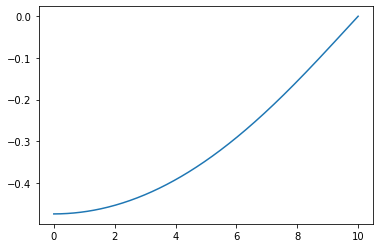

In [57]:
r1=np.linspace(0,10,500)
t=np.linspace(0,360,500)
plt.plot(r1,-WW(r1))

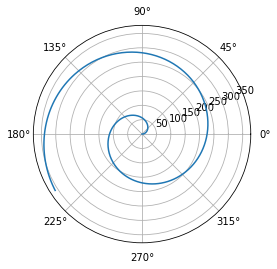

In [58]:
ax=plt.subplot(projection='polar')
ax.plot(r1,t)
ra, th = np.meshgrid(r1, t)

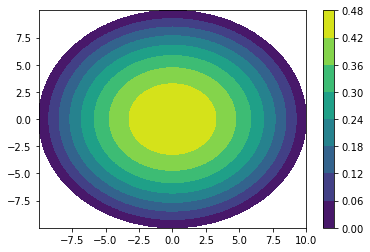

In [59]:
x1=ra*np.cos(th)
y1=ra*np.sin(th)
plt.contourf(x1,y1,WW(ra))
plt.colorbar()


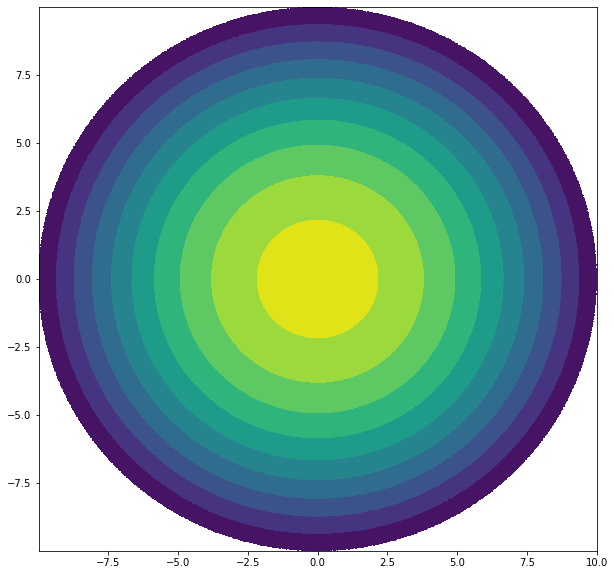

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(10,10))
ax = axes
f=fig
ax.contourf(x1,y1,WW(ra),levels=10)


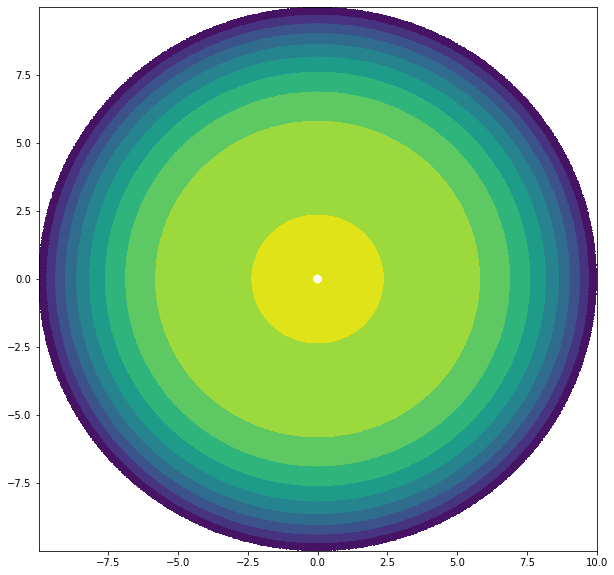

In [68]:
fig, axes = plt.subplots(1, 1, figsize=(10,10))
ax = axes
f=fig
ax.contourf(x1,y1,MR(ra),levels=10)



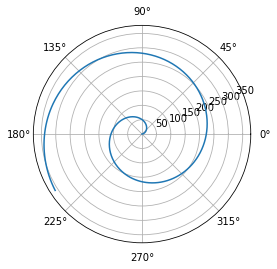

In [66]:
r1=np.linspace(0.2,10,500)
t=np.linspace(0,360,500)
plt.plot(r1,-WW(r1))
ax=plt.subplot(projection='polar')
ax.plot(r1,t)
ra, th = np.meshgrid(r1, t)


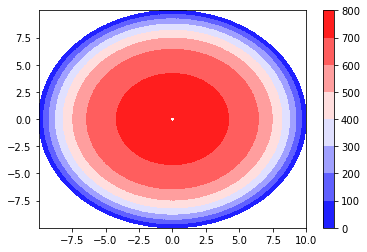

In [72]:
x1=ra*np.cos(th)
y1=ra*np.sin(th)
plt.contourf(x1,y1,MR(ra),cmap="bwr")
plt.colorbar()